In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:
csv_path='../../data/economic_forecast/年度数据.csv'
df = pd.read_csv(csv_path)
df.head()

,指标,国内生产总值(亿元),人均国内生产总值(元),城镇登记失业人数(万人),城镇登记失业率(%),居民人均消费支出(元),居民人均消费支出比上年增长(%),居民恩格尔系数(%),居民人均可支配收入(元),居民人均可支配收入比上年增长(%),全社会固定资产投资(亿元),全社会固定资产投资比上年增长(%),商品出口贸易总额(亿美元),商品进口贸易总额(亿美元),准货币供应量(亿元),居民消费价格指数(1978=100)
0,1990年,18872.9,1663,383.0,2.5,768,4.6,56.8,904,9.1,4517.0,2.4,NaN,NaN,8342.7,216.4
1,1991年,22005.6,1912,352.0,2.3,844,6.3,55.9,976,4.4,5594.5,23.9,NaN,NaN,10716.6,223.8
2,1992年,27194.5,2334,364.0,2.3,937,4.3,55.3,1125,8.4,8080.1,44.4,NaN,NaN,13670.7,238.1
3,1993年,35673.2,3027,420.0,2.6,1145,6.5,54.0,1385,7.3,13072.3,61.8,NaN,NaN,18599.4,273.1
4,1994年,48637.5,4081,476.0,2.8,1540,8.4,54.1,1870,8.8,17042.1,30.4,NaN,NaN,26382.8,339.0


In [3]:
date_time = [i for i in range(1990,2023)]

,国内生产总值(亿元),城镇登记失业人数(万人),居民恩格尔系数(%)
1990,18872.9,383.0,56.8
1991,22005.6,352.0,55.9
1992,27194.5,364.0,55.3
1993,35673.2,420.0,54.0
1994,48637.5,476.0,54.1
1995,61339.9,520.0,54.1
1996,71813.6,553.0,52.3
1997,79715.0,577.0,50.3
1998,85195.5,571.0,48.0
1999,90564.4,575.0,45.5


/Volumes/KeQing/APP/anaconda3/envs/data_analysis/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from current font.
  func(*args, **kwargs)
/Volumes/KeQing/APP/anaconda3/envs/data_analysis/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 20869 (\N{CJK UNIFIED IDEOGRAPH-5185}) missing from current font.
  func(*args, **kwargs)
/Volumes/KeQing/APP/anaconda3/envs/data_analysis/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from current font.
  func(*args, **kwargs)
/Volumes/KeQing/APP/anaconda3/envs/data_analysis/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 20135 (\N{CJK UNIFIED IDEOGRAPH-4EA7}) missing from current font.
  func(*args, **kwargs)
/Volumes/KeQing/APP/anaconda3/envs/data_analysis/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 24635 (\N{CJK UNIFIED IDE

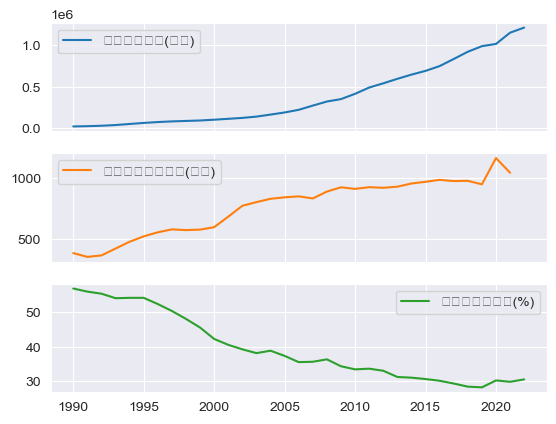

In [4]:
plot_cols = ['国内生产总值(亿元)', '城镇登记失业人数(万人)', '居民恩格尔系数(%)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)
plot_features

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
国内生产总值(亿元),33.0,386030.587879,370757.787604,18872.90,85195.500,219438.500,643563.1000,1210207.20
人均国内生产总值(元),33.0,28207.393939,26137.079093,1663.00,6860.000,16738.000,46912.0000,85698.00
城镇登记失业人数(万人),32.0,764.093750,224.145454,352.00,574.000,834.500,930.7500,1160.00
城镇登记失业率(%),32.0,3.618750,0.647794,2.30,3.100,4.000,4.1000,4.30
居民人均消费支出(元),33.0,8803.909091,7647.880713,768.00,2516.000,5634.000,14491.0000,24538.00
居民人均消费支出比上年增长(%),33.0,7.357576,3.529255,-4.00,6.200,7.500,8.8000,13.90
居民恩格尔系数(%),33.0,39.496970,9.628814,28.20,31.000,36.300,48.0000,56.80
居民人均可支配收入(元),33.0,12253.030303,11282.551838,904.00,3254.000,7229.000,20167.0000,36883.00
居民人均可支配收入比上年增长(%),33.0,8.257576,2.459806,2.10,6.900,8.400,9.9000,13.30
全社会固定资产投资(亿元),33.0,195063.742424,198777.195436,4517.00,28406.200,97583.100,373636.9000,579556.00


In [11]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [12]:
train_df

,指标,国内生产总值(亿元),人均国内生产总值(元),城镇登记失业人数(万人),城镇登记失业率(%),居民人均消费支出(元),居民人均消费支出比上年增长(%),居民恩格尔系数(%),居民人均可支配收入(元),居民人均可支配收入比上年增长(%),全社会固定资产投资(亿元),全社会固定资产投资比上年增长(%),商品出口贸易总额(亿美元),商品进口贸易总额(亿美元),准货币供应量(亿元),居民消费价格指数(1978=100)
0,1990年,18872.9,1663,383.0,2.5,768,4.6,56.8,904,9.1,4517.0,2.4,NaN,NaN,8342.70,216.4
1,1991年,22005.6,1912,352.0,2.3,844,6.3,55.9,976,4.4,5594.5,23.9,NaN,NaN,10716.60,223.8
2,1992年,27194.5,2334,364.0,2.3,937,4.3,55.3,1125,8.4,8080.1,44.4,NaN,NaN,13670.70,238.1
3,1993年,35673.2,3027,420.0,2.6,1145,6.5,54.0,1385,7.3,13072.3,61.8,NaN,NaN,18599.40,273.1
4,1994年,48637.5,4081,476.0,2.8,1540,8.4,54.1,1870,8.8,17042.1,30.4,NaN,NaN,26382.80,339.0
5,1995年,61339.9,5091,520.0,2.9,1957,8.5,54.1,2363,7.9,20019.3,17.5,1487.80,1320.78,36763.40,396.9
6,1996年,71813.6,5898,553.0,3.0,2288,7.9,52.3,2814,9.9,22974.0,14.8,NaN,NaN,47580.10,429.9
7,1997年,79715.0,6481,577.0,3.1,2437,3.6,50.3,3070,6.1,24941.1,8.8,NaN,NaN,56169.10,441.9
8,1998年,85195.5,6860,571.0,3.1,2516,4.1,48.0,3254,6.9,28406.2,13.9,NaN,NaN,65544.90,438.4
9,1999年,90564.4,7229,575.0,3.1,2658,7.1,45.5,3485,8.6,29854.7,5.1,NaN,NaN,74060.60,432.2


In [73]:
val_df.keys()

Index(['人均国内生产总值(元)', '全社会固定资产投资(亿元)', '全社会固定资产投资比上年增长(%)', '准货币供应量(亿元)',
       '商品出口贸易总额(亿美元)', '商品进口贸易总额(亿美元)', '国内生产总值(亿元)', '城镇登记失业人数(万人)',
       '城镇登记失业率(%)', '居民人均可支配收入(元)', '居民人均可支配收入比上年增长(%)', '居民人均消费支出(元)',
       '居民人均消费支出比上年增长(%)', '居民恩格尔系数(%)', '居民消费价格指数(1978=100)', '指标'],
      dtype='object')

In [14]:
test_df

,指标,国内生产总值(亿元),人均国内生产总值(元),城镇登记失业人数(万人),城镇登记失业率(%),居民人均消费支出(元),居民人均消费支出比上年增长(%),居民恩格尔系数(%),居民人均可支配收入(元),居民人均可支配收入比上年增长(%),全社会固定资产投资(亿元),全社会固定资产投资比上年增长(%),商品出口贸易总额(亿美元),商品进口贸易总额(亿美元),准货币供应量(亿元),居民消费价格指数(1978=100)
29,2019年,986515.2,70078,945.0,3.6,21559,5.5,28.2,30733,5.8,513608.3,5.1,24994.82,20784.09,1410479.67,669.8
30,2020年,1013567.0,71828,1160.0,4.2,21210,-4.0,30.2,32189,2.1,527270.3,2.7,25899.50,20659.60,1561214.90,686.5
31,2021年,1149237.0,81370,1040.0,4.0,24100,12.6,29.8,35128,8.1,552884.2,4.9,33630.20,26871.40,1735456.21,692.7
32,2022年,1210207.2,85698,NaN,NaN,24538,-0.2,30.5,36883,2.9,579556.0,4.9,NaN,NaN,NaN,NaN


In [15]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

/var/folders/fg/vwbl7xrj45z_3_2x6_v2s8x80000gn/T/ipykernel_3819/1429736173.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_mean = train_df.mean()
/var/folders/fg/vwbl7xrj45z_3_2x6_v2s8x80000gn/T/ipykernel_3819/1429736173.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_std = train_df.std()


In [23]:
df_std = (df - train_mean) / train_std

In [27]:
df_std=df_std.iloc[:,:15]

In [29]:
df_std = df_std.melt(var_name='Column', value_name='Normalized')

ValueError: The number of FixedLocator locations (15), usually from a call to set_ticks, does not match the number of labels (16).

/Volumes/KeQing/APP/anaconda3/envs/data_analysis/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  func(*args, **kwargs)
/Volumes/KeQing/APP/anaconda3/envs/data_analysis/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  func(*args, **kwargs)
/Volumes/KeQing/APP/anaconda3/envs/data_analysis/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from current font.
  func(*args, **kwargs)
/Volumes/KeQing/APP/anaconda3/envs/data_analysis/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 20869 (\N{CJK UNIFIED IDEOGRAPH-5185}) missing from current font.
  func(*args, **kwargs)
/Volumes/KeQing/APP/anaconda3/envs/data_analysis/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDE

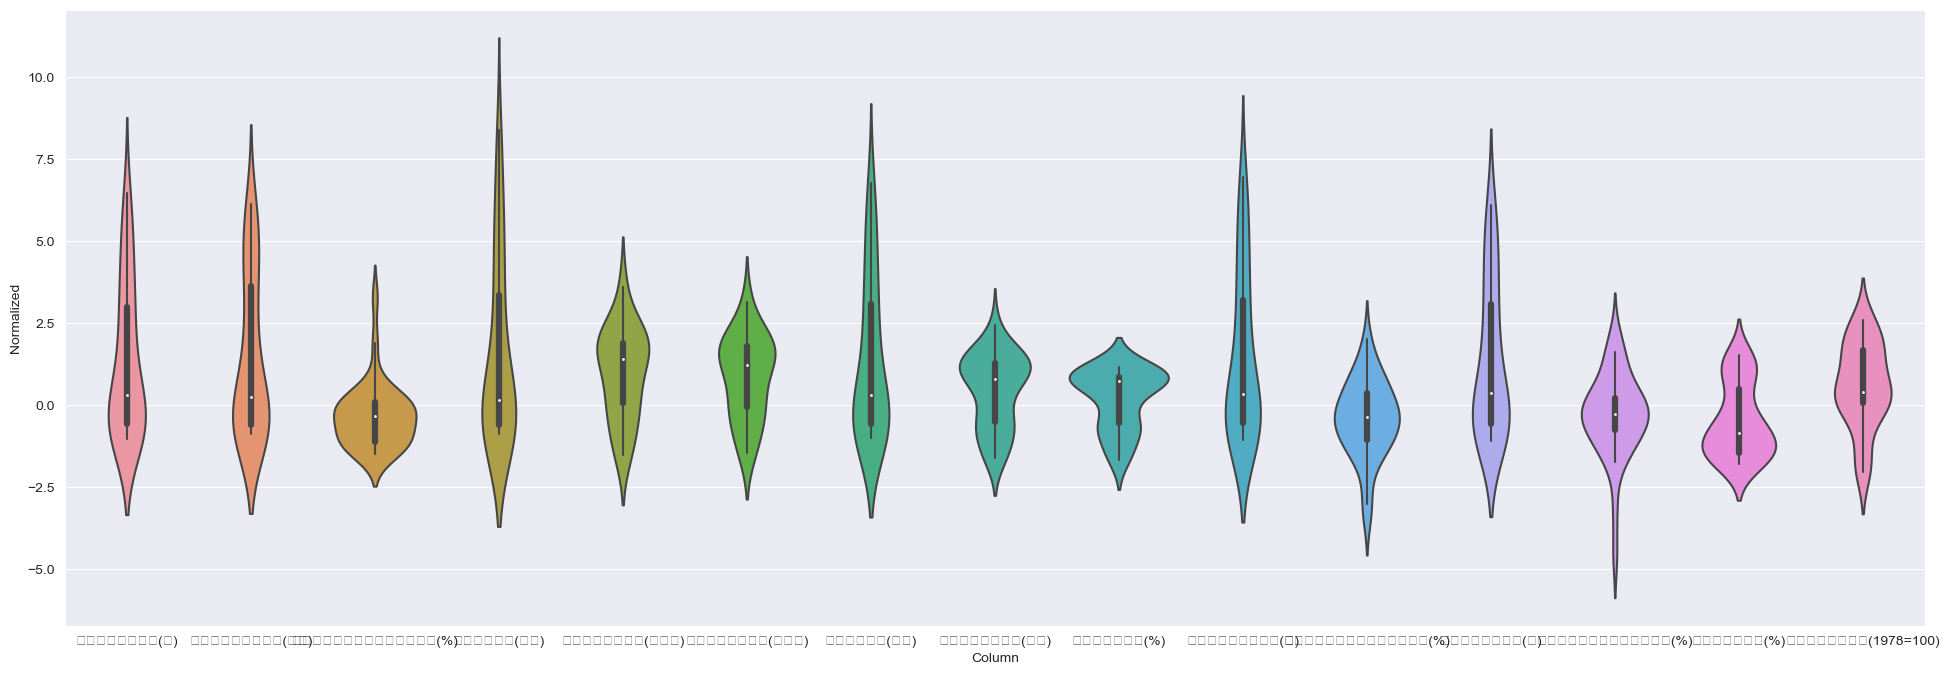

In [32]:
plt.figure(figsize=(24, 8))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [33]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [35]:
w1 = WindowGenerator(input_width=16, label_width=1, shift=24,
                     label_columns=['国内生产总值(亿元)'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['国内生产总值(亿元)']

In [36]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['国内生产总值(亿元)'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['国内生产总值(亿元)']

In [37]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [39]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[1:1+w2.total_window_size]),
                           np.array(train_df[2:2+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 16)
Inputs shape: (3, 6, 16)
Labels shape: (3, 1, 1)


In [40]:
w2.example = example_inputs, example_labels

In [43]:
def plot(self, model=None, plot_col='国内生产总值(亿元)', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

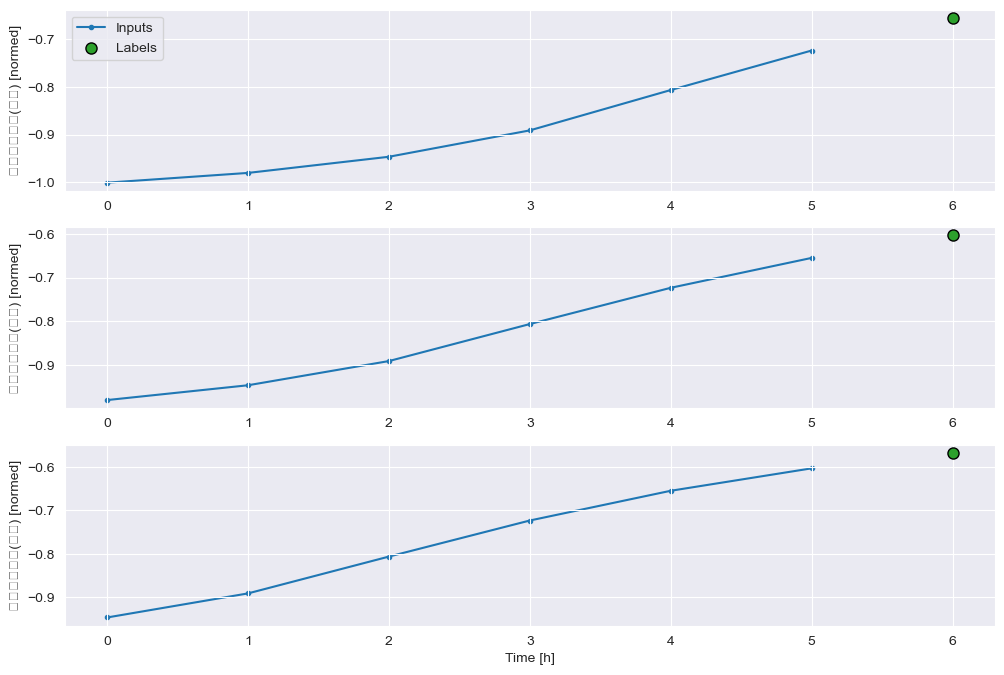

In [44]:
w2.plot()

In [45]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [46]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [47]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

2023-05-16 20:18:08.003856: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Inputs shape (batch, time, features): (17, 6, 16)
Labels shape (batch, time, features): (17, 1, 1)


In [48]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['国内生产总值(亿元)'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['国内生产总值(亿元)']

In [49]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (22, 1, 16)
Labels shape (batch, time, features): (22, 1, 1)


In [50]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [52]:
baseline = Baseline(label_index=column_indices['国内生产总值(亿元)'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

1/1 [==============================] - 0s 359ms/step - loss: 0.0339 - mean_absolute_error: 0.1508


In [58]:
wide_window = WindowGenerator(
    input_width=16, label_width=16, shift=1,
    label_columns=['国内生产总值(亿元)'])

wide_window

Total window size: 17
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Label column name(s): ['国内生产总值(亿元)']

In [59]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (7, 16, 16)
Output shape: (7, 16, 1)


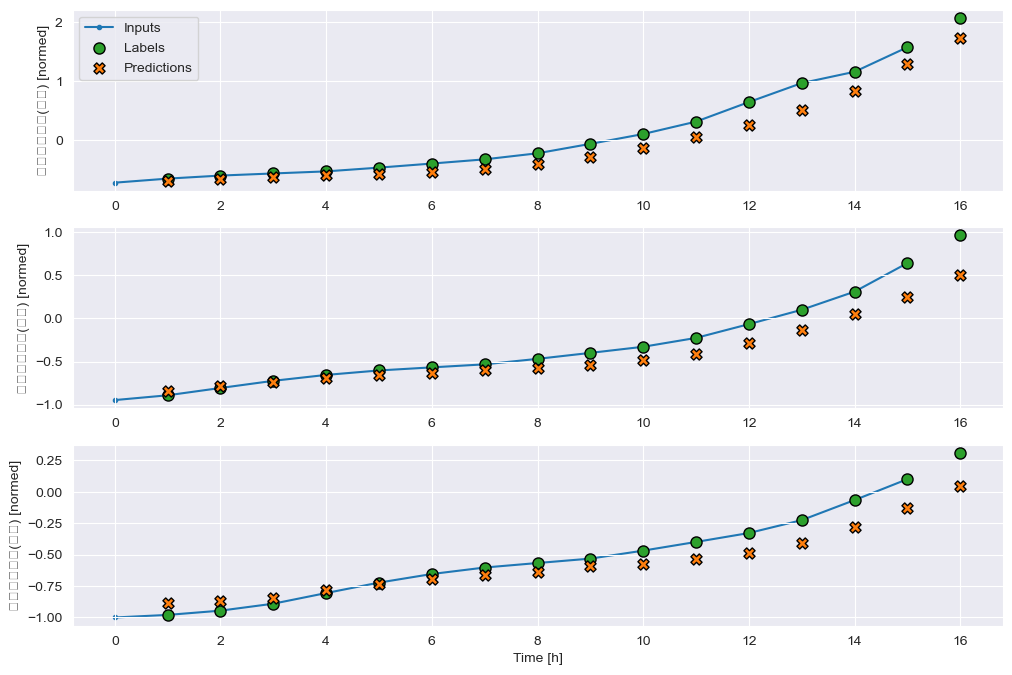

In [60]:
wide_window.plot(baseline)

In [61]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [62]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (7, 16, 16)
Output shape: (7, 16, 1)


In [63]:
MAX_EPOCHS = 20
def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [66]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()

In [72]:
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

OverflowError: cannot convert float infinity to integer

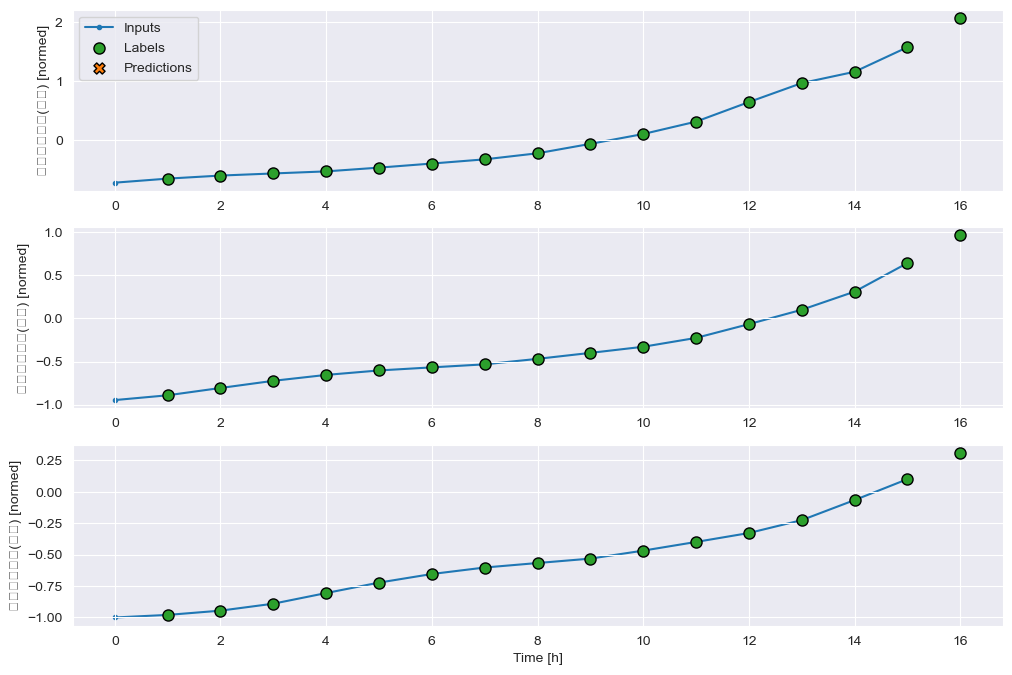

In [69]:
wide_window.plot(lstm_model)

In [71]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [国内生产总值(亿元), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

IndexError: list index out of range